# Exploratory Data Analysis

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

In [2]:
# Data loading
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## General data info

In [3]:
y.shape

(250000,)

In [4]:
tX.shape

(250000, 30)

In [5]:
ids.shape

(250000,)

In [6]:
ids

array([100000, 100001, 100002, ..., 349997, 349998, 349999])

We find that we have 250'000 data points, each to be correlated with 30 features.
Each data point also has an id ranging from 100'000 to 349'999, I expect the offset of 100'000 to be chosen such that each id contains 6 digits.

## Having a look at the features

As a quick analysis, we can see few groups forming. They are separated by the following properties: does it have -999 points? Does it have outliers? Are the -999 points connected?
For the first and last properties, we can see two groups emerge. There's a majority of A (with 72543 points) and three B (with 150087 points). 
Then, we can find two other groups: the one with outliers and the one without. In most cases the one with outliers have positive values that can go quite big, the others have pretty small values well distributed around zero.
Two outsiders show up, feature 1 - which has -999 points but belongs to no groups - and feature 23 - which only has the integer values 0 to 3.

After consulting the documentation of the dataset at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf we can draw more conclusions about the features:

There are two types of features:
- primitive (PRI): data that was collected by CERN
- derived (DER): data that was derived from the primitive features
I would argue that the primitive features are the most important features, since the derived features add redundancy to the data. But those derived features might help us yield better results from our algorithm, so we should not discard them from the start.

All features that have undefined values (-999) (except feature 1) are related to jetnum (feature 23), and only have undefined values for some values of jetnum.
Furthermore, features 9 and 10 depend on jetnum, because they are sums of other features and have more variables to sum if there are more jets.
Feature 1 has undefined values, but the condition for which a value is undefined cannot be extracted from our dataset.

In [7]:
index = np.linspace(1, tX.shape[0], tX.shape[0])

### Feature 1

In [8]:
feature_1 = tX[:,0]
feature_1

array([ 138.47 ,  160.937, -999.   , ...,  105.457,   94.951, -999.   ])

Text(0.5, 1.0, 'Feature 1 distribution')

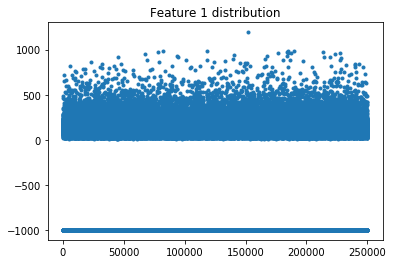

In [9]:
plt.scatter(index, feature_1, marker='.')
plt.title("Feature 1 distribution")

We see that we have some feature points located at -999. They might represent a missing feature in this case. It's not a case of true/false, since data points that are not -999 range between 0 and 1000.

In [10]:
#let's remove the -999
cleaned_feature = []
for x in feature_1:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

211886

Text(0.5, 1.0, 'Feature 1 distribution without -999')

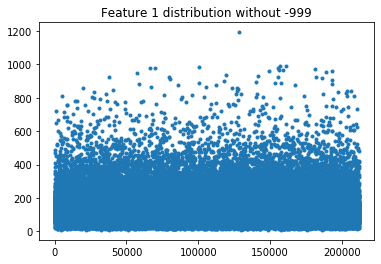

In [11]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 1 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 1')

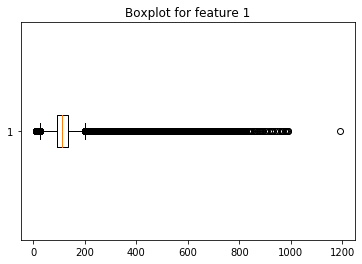

In [12]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 1")

Text(0.5, 1.0, 'Boxplot for feature 1 without outliers')

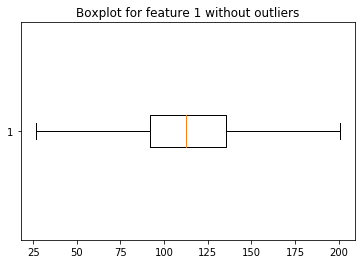

In [13]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 1 without outliers")

We see that the remaining data has a ton of outliers towards the top.
According to the boxplot without outliers, the significant data ranges from around 25 to around 200. A massive cleaning of this feature might be needed.

### Feature 2

In [14]:
feature_2 = tX[:,1]
feature_2

array([ 51.655,  68.768, 162.172, ...,  60.526,  19.362,  72.756])

Text(0.5, 1.0, 'Feature 2 distribution')

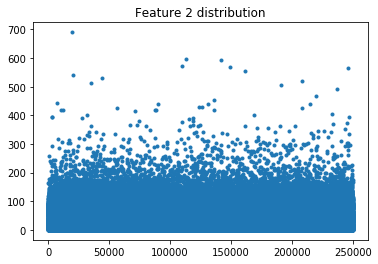

In [15]:
plt.scatter(index, feature_2, marker='.')
plt.title("Feature 2 distribution")

Text(0.5, 1.0, 'Boxplot for feature 2')

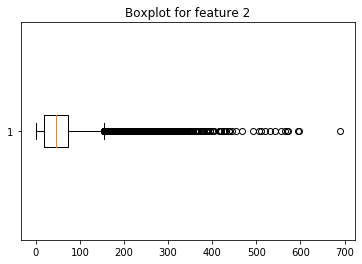

In [16]:
plt.boxplot(feature_2, vert=False)
plt.title("Boxplot for feature 2")

Text(0.5, 1.0, 'Boxplot for feature 2 without outliers')

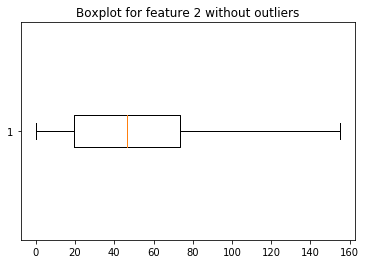

In [17]:
plt.boxplot(feature_2, vert=False, showfliers=False)
plt.title("Boxplot for feature 2 without outliers")

This time, the data doesn't have -999 points, but there still are a lot of outliers. It would be good to check if those outliers are the same as in feature 1.

Significant data seems contained in range 0 to 160

### Feature 3

In [18]:
feature_3 = tX[:,2]
feature_3

array([ 97.827, 103.235, 125.953, ...,  75.839,  68.812,  70.831])

Text(0.5, 1.0, 'Feature 3 distribution')

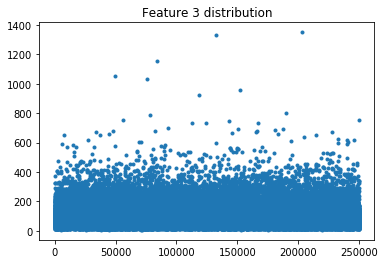

In [19]:
plt.scatter(index, feature_3, marker='.')
plt.title("Feature 3 distribution")

Text(0.5, 1.0, 'Boxplot for feature 3')

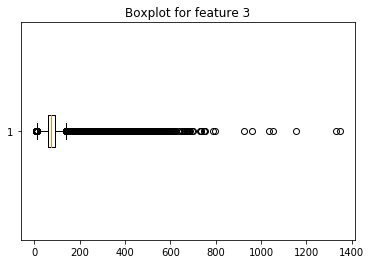

In [20]:
plt.boxplot(feature_3, vert=False)
plt.title("Boxplot for feature 3")

Text(0.5, 1.0, 'Boxplot for feature 3 without outliers')

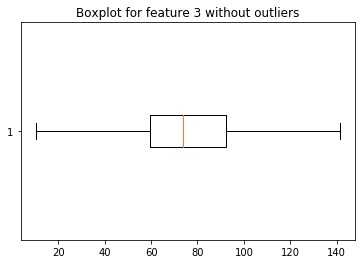

In [21]:
plt.boxplot(feature_3, vert=False, showfliers=False)
plt.title("Boxplot for feature 3 without outliers")

Same conclusions as feature 2, significant data seems contained in range 0 to 140

### Feature 4

In [22]:
feature_4 = tX[:,3]
feature_4

array([27.98 , 48.146, 35.635, ..., 39.757, 13.504,  7.479])

Text(0.5, 1.0, 'Feature 4 distribution')

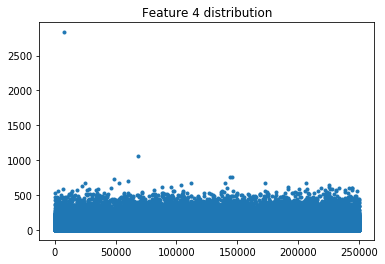

In [23]:
plt.scatter(index, feature_4, marker='.')
plt.title("Feature 4 distribution")

Text(0.5, 1.0, 'Boxplot for feature 4')

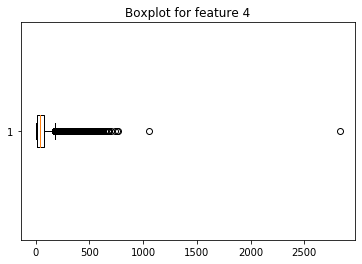

In [24]:
plt.boxplot(feature_4, vert=False)
plt.title("Boxplot for feature 4")

Text(0.5, 1.0, 'Boxplot for feature 4 without outliers')

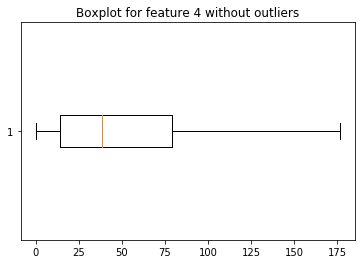

In [25]:
plt.boxplot(feature_4, vert=False, showfliers=False)
plt.title("Boxplot for feature 4 without outliers")

Same conclusions as features 2 and 3. Significant data seems contained in range 0 to 175

### Feature 5

In [26]:
feature_5 = tX[:,4]
feature_5

array([ 9.10e-01, -9.99e+02, -9.99e+02, ..., -9.99e+02, -9.99e+02,
       -9.99e+02])

Text(0.5, 1.0, 'Feature 5 distribution')

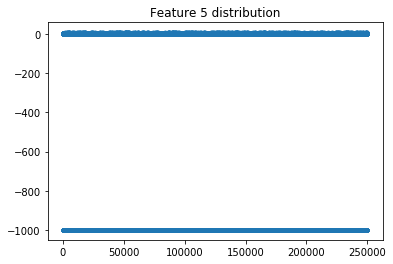

In [27]:
plt.scatter(index, feature_5, marker='.')
plt.title("Feature 5 distribution")

This time again, we seem to have -999 points. The rest of the data points seem rather contained too

In [28]:
#let's remove the -999
cleaned_feature = []
for x in feature_5:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 5 distribution without -999')

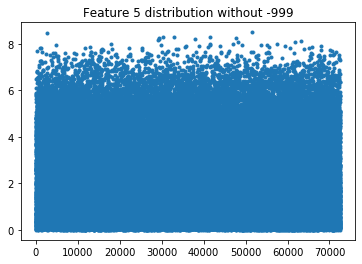

In [29]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 5 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 5')

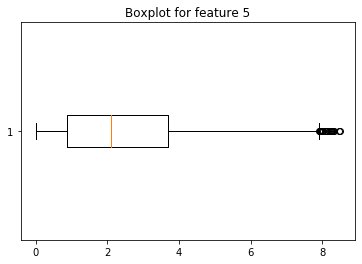

In [30]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 5")

Text(0.5, 1.0, 'Boxplot for feature 5 without outliers')

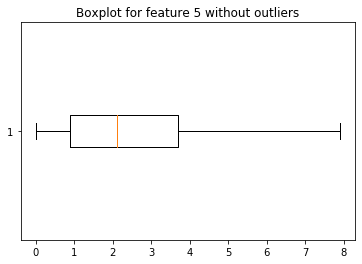

In [31]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 5 without outliers")

When the -999 points are removed, we seem to have significant data contained in range 0 to 8, with not many outliers compared to other features. We can also see that we have a lot more -999 points in feature 5 than in feature 1. So not only do they not refer to the same points as feature 1, but removing them might leave us with a considerably smaller dataset

### Feature 6

In [32]:
feature_6 = tX[:,5]
feature_6

array([ 124.711, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 6 distribution')

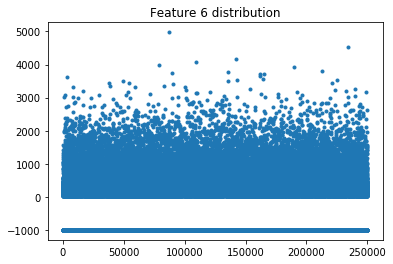

In [33]:
plt.scatter(index, feature_6, marker='.')
plt.title("Feature 6 distribution")

This time again, we seem to have -999 points.

In [34]:
#let's remove the -999
cleaned_feature = []
for x in feature_6:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 6 distribution without -999')

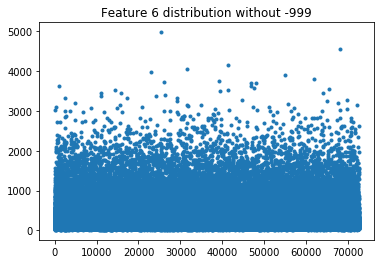

In [35]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 6 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 6')

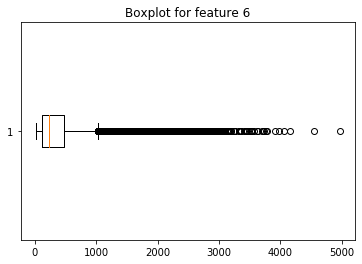

In [36]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 6")

Text(0.5, 1.0, 'Boxplot for feature 6 without outliers')

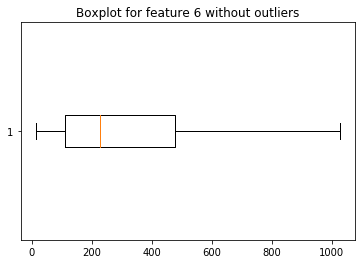

In [37]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 6 without outliers")

feature 6 and feature 5 seem to have the same number of -999 points. We'll compare them below.

Significant data seems contained in range 0 to ~1000

In [38]:
feature_5_comparator = np.copy(feature_5)
for i in range(len(feature_5_comparator)):
    if feature_5_comparator[i] != -999:
        feature_5_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
feature_6_comparator = np.copy(feature_6)
for i in range(len(feature_6_comparator)):
    if feature_6_comparator[i] != -999:
        feature_6_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_5_comparator - feature_6_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

We see that feature 5 and 6 have -999 points at the same id, so they probably are somehow linked.

### Feature 7

In [39]:
feature_7 = tX[:,6]
feature_7

array([   2.666, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 7 distribution')

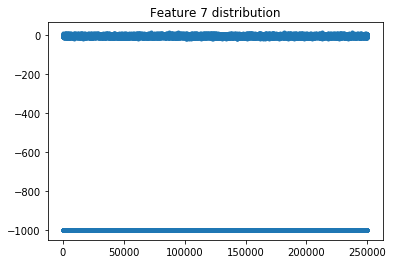

In [40]:
plt.scatter(index, feature_7, marker='.')
plt.title("Feature 7 distribution")

This time again, we seem to have -999 points.

In [41]:
#let's remove the -999
cleaned_feature = []
for x in feature_7:
    if x != -999:
        cleaned_feature.append(x)
len(cleaned_feature)

72543

Text(0.5, 1.0, 'Feature 7 distribution without -999')

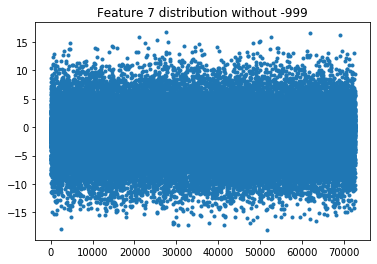

In [42]:
cleaned_index = [i for i in range(len(cleaned_feature))]
plt.scatter(cleaned_index, cleaned_feature, marker='.')
plt.title("Feature 7 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 7')

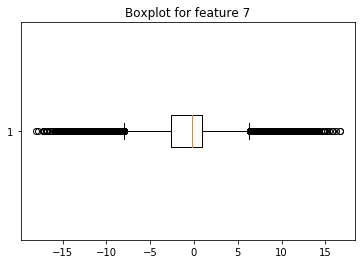

In [43]:
plt.boxplot(cleaned_feature, vert=False)
plt.title("Boxplot for feature 7")

Text(0.5, 1.0, 'Boxplot for feature 7 without outliers')

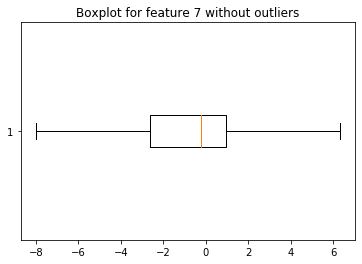

In [44]:
plt.boxplot(cleaned_feature, vert=False, showfliers=False)
plt.title("Boxplot for feature 7 without outliers")

feature 7 and features 5 and 6 seem to have the same number of -999 points. We'll compare them below.

This time data can be negative. The significant data rnages between -8 and 6 and seems to have a median around 0.

In [45]:
feature_7_comparator = np.copy(feature_7)
for i in range(len(feature_7_comparator)):
    if feature_7_comparator[i] != -999:
        feature_7_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
feature_6_comparator = np.copy(feature_6)
for i in range(len(feature_6_comparator)):
    if feature_6_comparator[i] != -999:
        feature_6_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_7_comparator - feature_6_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

We can now link features 5, 6 and 7 as having the same number of -999 points

### Feature 8

In [46]:
feature_8 = tX[:,7]
feature_8

array([3.064, 3.473, 3.148, ..., 2.39 , 3.365, 2.025])

Text(0.5, 1.0, 'Feature 8 distribution')

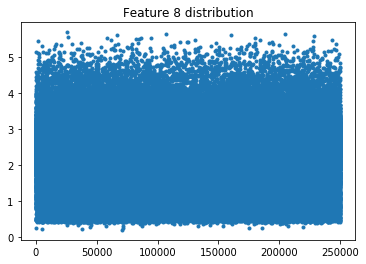

In [47]:
plt.scatter(index, feature_8, marker='.')
plt.title("Feature 8 distribution")

Text(0.5, 1.0, 'Boxplot for feature 8')

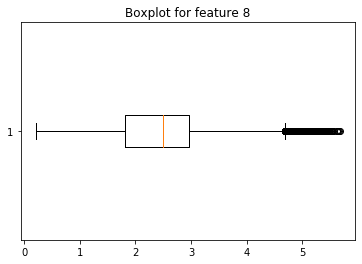

In [48]:
plt.boxplot(feature_8, vert=False)
plt.title("Boxplot for feature 8")

Text(0.5, 1.0, 'Boxplot for feature 8 without outliers')

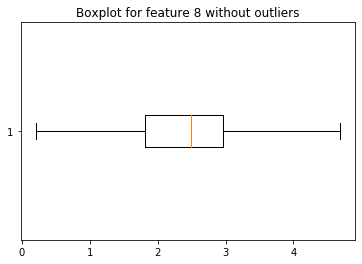

In [49]:
plt.boxplot(feature_8, vert=False, showfliers=False)
plt.title("Boxplot for feature 8 without outliers")

No -999 points this time. Significant data seems ranged between 0 and 5

### Feature 9

In [50]:
feature_9 = tX[:,8]
feature_9

array([41.928,  2.078,  9.336, ..., 22.183, 13.504,  7.479])

Text(0.5, 1.0, 'Feature 9 distribution')

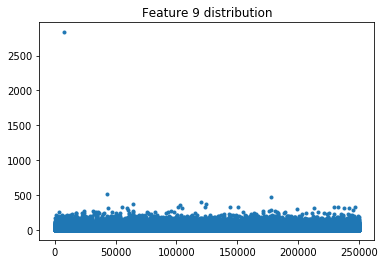

In [51]:
plt.scatter(index, feature_9, marker='.')
plt.title("Feature 9 distribution")

Text(0.5, 1.0, 'Boxplot for feature 9')

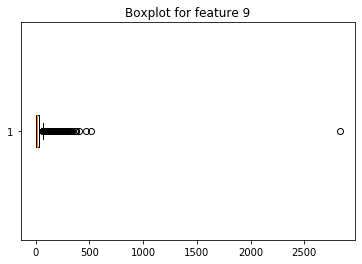

In [52]:
plt.boxplot(feature_9, vert=False)
plt.title("Boxplot for feature 9")

Text(0.5, 1.0, 'Boxplot for feature 9 without outliers')

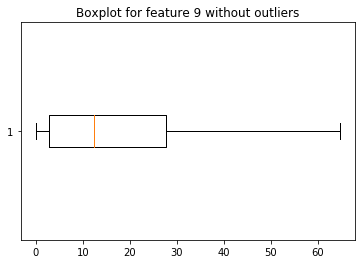

In [53]:
plt.boxplot(feature_9, vert=False, showfliers=False)
plt.title("Boxplot for feature 9 without outliers")

Same conclusions as feature 8. Significant data ranges between 0 and 70

### Feature 10

In [54]:
feature_10 = tX[:,9]
feature_10

array([197.76 , 125.157, 197.814, ..., 120.462,  55.859,  83.24 ])

Text(0.5, 1.0, 'Feature 10 distribution')

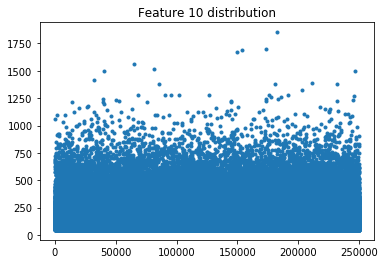

In [55]:
plt.scatter(index, feature_10, marker='.')
plt.title("Feature 10 distribution")

Text(0.5, 1.0, 'Boxplot for feature 10')

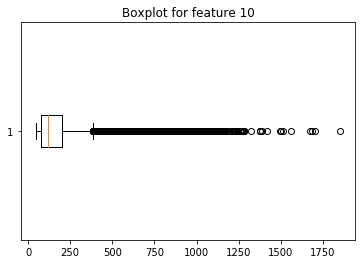

In [56]:
plt.boxplot(feature_10, vert=False)
plt.title("Boxplot for feature 10")

Text(0.5, 1.0, 'Boxplot for feature 10 without outliers')

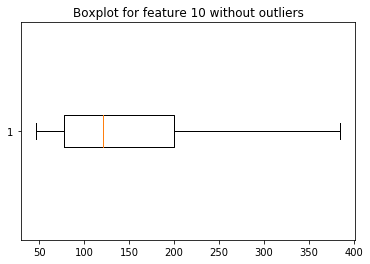

In [57]:
plt.boxplot(feature_10, vert=False, showfliers=False)
plt.title("Boxplot for feature 10 without outliers")

Same conclusions as feature 9. Significant data seems range between 50 and 400

## Feature 11

In [58]:
feature_11 = tX[:,10]
feature_11

array([1.582, 0.879, 3.776, ..., 1.202, 0.999, 0.936])

Text(0.5, 1.0, 'Feature 11 distribution')

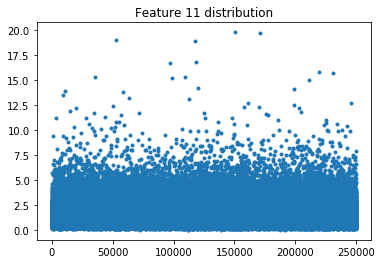

In [59]:
plt.scatter(index, feature_11, marker='.')
plt.title("Feature 11 distribution")

Text(0.5, 1.0, 'Boxplot for feature 11')

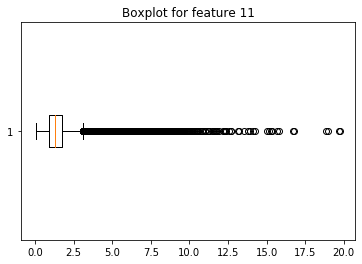

In [60]:
plt.boxplot(feature_11, vert=False)
plt.title("Boxplot for feature 11")

Text(0.5, 1.0, 'Boxplot for feature 11 without outliers')

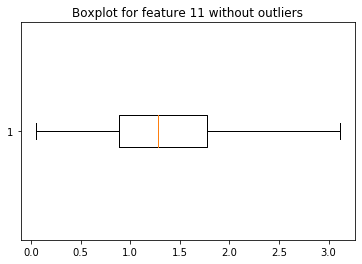

In [61]:
plt.boxplot(feature_11, vert=False, showfliers=False)
plt.title("Boxplot for feature 11 without outliers")

Same conclusion than 10. Significant data seems to range between 0 and 3. 

## Feature 12

In [62]:
feature_12 = tX[:,11]
feature_12

array([ 1.396,  1.414,  1.414, ...,  0.529,  1.414, -1.411])

Text(0.5, 1.0, 'Feature 12 distribution')

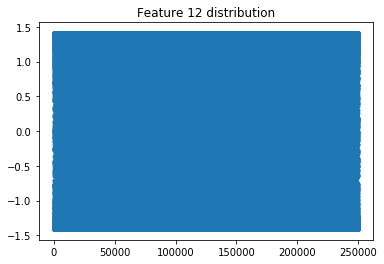

In [63]:
plt.scatter(index, feature_12, marker='.')
plt.title("Feature 12 distribution")

Text(0.5, 1.0, 'Boxplot for feature 12')

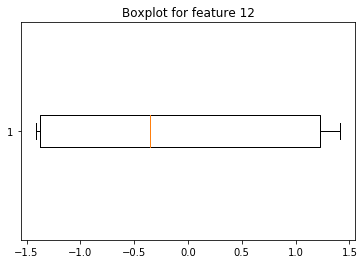

In [64]:
plt.boxplot(feature_12, vert=False)
plt.title("Boxplot for feature 12")

This time there is no outlier, no data -999 point either. Data ranges between -1.5 and 1.5.

## Feature 13

In [65]:
feature_13 = tX[:,12]
feature_13

array([ 2.00e-01, -9.99e+02, -9.99e+02, ..., -9.99e+02, -9.99e+02,
       -9.99e+02])

Text(0.5, 1.0, 'Feature 13 distribution')

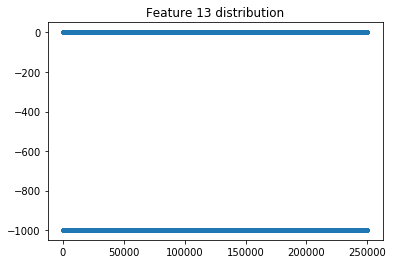

In [66]:
plt.scatter(index, feature_13, marker='.')
plt.title("Feature 13 distribution")

We have -999 points once more in this one.

In [67]:
#let's remove the -999
cleaned_feature_13 = []
for x in feature_13:
    if x != -999:
        cleaned_feature_13.append(x)
len(cleaned_feature_13)

72543

Text(0.5, 1.0, 'Feature 13 distribution without -999')

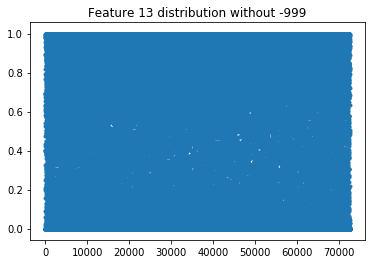

In [68]:
cleaned_index_13 = [i for i in range(len(cleaned_feature_13))]
plt.scatter(cleaned_index_13, cleaned_feature_13, marker='.')
plt.title("Feature 13 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 13')

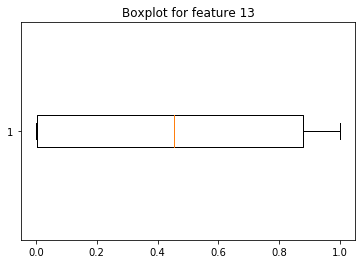

In [69]:
plt.boxplot(cleaned_feature_13, vert=False)
plt.title("Boxplot for feature 13")

In [70]:
feature_13_comparator = np.copy(feature_13)
for i in range(len(feature_13_comparator)):
    if feature_13_comparator[i] != -999:
        feature_13_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_13_comparator - feature_7_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

We can now link features 5, 6, 7 and 13 as having the same number of -999 points. This time however we can also see that the data also has very few outliers. Furthermore, it is ranged between 0 and 1.

## Feature 14

In [71]:
feature_14 = tX[:,13]
feature_14

array([32.638, 42.014, 32.154, ..., 35.636, 27.944, 43.003])

Text(0.5, 1.0, 'Feature 14 distribution')

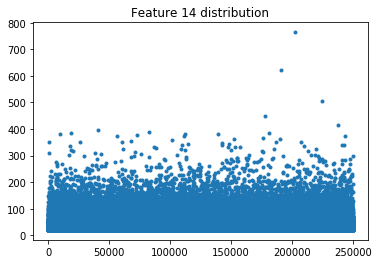

In [74]:
plt.scatter(index, feature_14, marker='.')
plt.title("Feature 14 distribution")

Text(0.5, 1.0, 'Boxplot for feature 14')

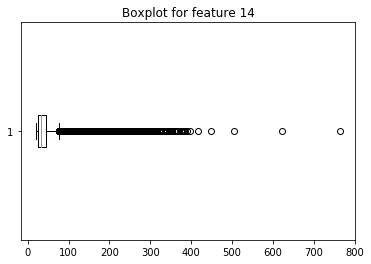

In [76]:
plt.boxplot(feature_14, vert=False)
plt.title("Boxplot for feature 14")

Text(0.5, 1.0, 'Boxplot for feature 14 without outliers')

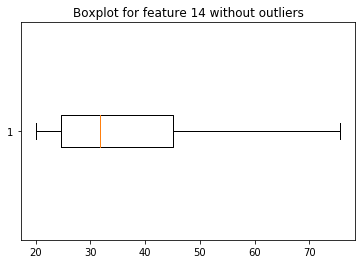

In [77]:
plt.boxplot(feature_14, vert=False, showfliers=False)
plt.title("Boxplot for feature 14 without outliers")

This time the data looks more like what we had in 10, 9 and 8. The significant data range between 20 and 70.

## Feature 15

In [82]:
feature_15 = tX[:,14]
feature_15

array([ 1.017,  2.039, -0.705, ..., -0.266, -2.211,  1.685])

Text(0.5, 1.0, 'Feature 15 distribution')

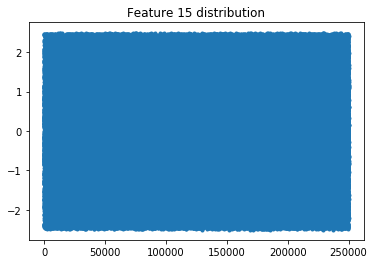

In [84]:
plt.scatter(index, feature_15, marker='.')
plt.title("Feature 15 distribution")

Text(0.5, 1.0, 'Boxplot for feature 15')

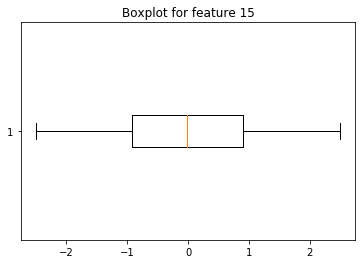

In [85]:
plt.boxplot(feature_15, vert=False)
plt.title("Boxplot for feature 15")

This time can be negative and looks a lot like feature 12. The data ranges between -2 and 2.

## Feature 16

In [86]:
feature_16 = tX[:,15]
feature_16

array([ 0.381, -3.011, -2.093, ..., -3.132,  2.792,  2.653])

Text(0.5, 1.0, 'Feature 16 distribution')

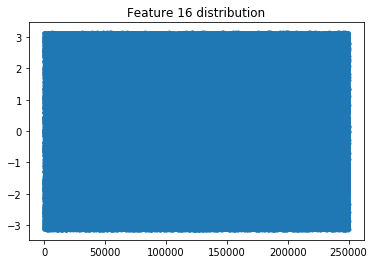

In [93]:
plt.scatter(index, feature_16, marker='.')
plt.title("Feature 16 distribution")

Text(0.5, 1.0, 'Boxplot for feature 16')

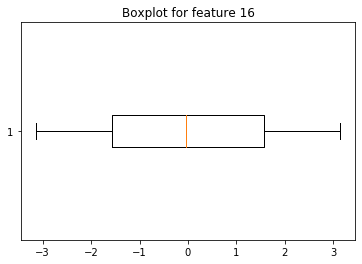

In [90]:
plt.boxplot(feature_16, vert=False)
plt.title("Boxplot for feature 16")

The data looks a lot like feature 15. Ranges from -3 to 3.

## Feature 17

In [91]:
feature_17 = tX[:,16]
feature_17

array([ 51.626,  36.918, 121.409, ...,  42.834,  27.915,  40.236])

Text(0.5, 1.0, 'Feature 17 distribution')

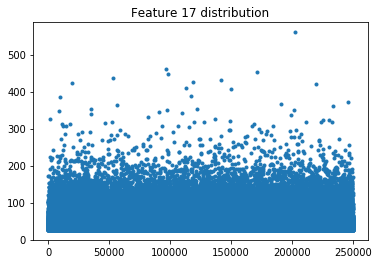

In [92]:
plt.scatter(index, feature_17, marker='.')
plt.title("Feature 17 distribution")

Text(0.5, 1.0, 'Boxplot for feature 17')

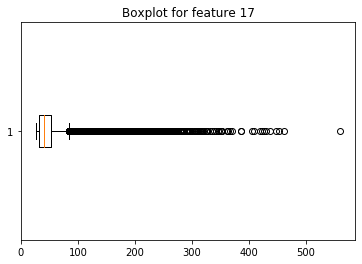

In [95]:
plt.boxplot(feature_17, vert=False)
plt.title("Boxplot for feature 17")

Text(0.5, 1.0, 'Boxplot for feature 17 without outliers')

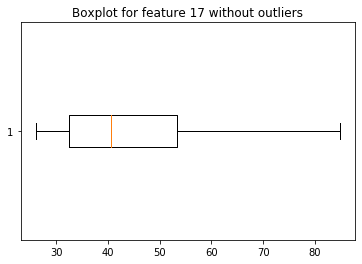

In [97]:
plt.boxplot(feature_17, vert=False, showfliers=False)
plt.title("Boxplot for feature 17 without outliers")

The data looks like what we had in 14, 10, 9 and 8. The significant data range between 25 and 85.

## Feature 18

In [98]:
feature_18 = tX[:,17]
feature_18

array([ 2.273,  0.501, -0.953, ...,  0.381, -0.874,  1.49 ])

Text(0.5, 1.0, 'Feature 18 distribution')

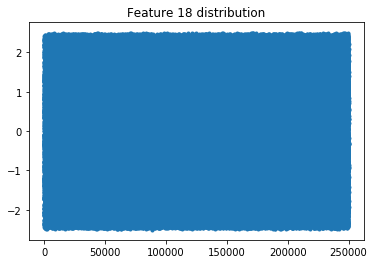

In [99]:
plt.scatter(index, feature_18, marker='.')
plt.title("Feature 18 distribution")

Text(0.5, 1.0, 'Boxplot for feature 18')

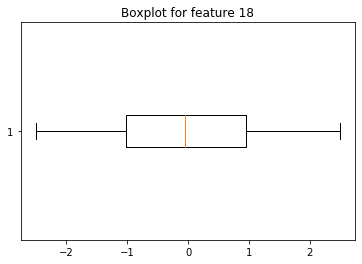

In [125]:
plt.boxplot(feature_18, vert=False)
plt.title("Boxplot for feature 18")

The data looks a lot like feature 15 and 16. Ranges from -2 to 2.

## Feature 19

In [101]:
feature_19 = tX[:,18]
feature_19

array([-2.414,  0.103,  1.052, ...,  0.851, -0.296,  0.637])

Text(0.5, 1.0, 'Feature 19 distribution')

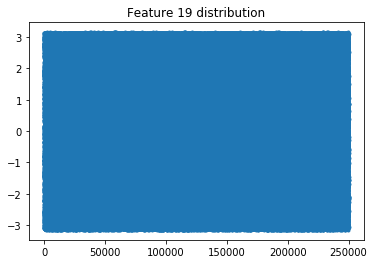

In [102]:
plt.scatter(index, feature_19, marker='.')
plt.title("Feature 19 distribution")

Text(0.5, 1.0, 'Boxplot for feature 19')

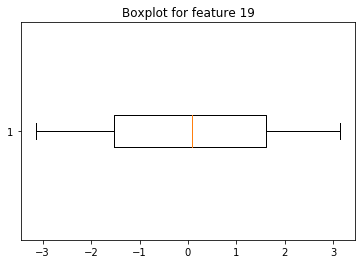

In [126]:
plt.boxplot(feature_19, vert=False)
plt.title("Boxplot for feature 19")

The data looks a lot like feature 15, 16 and 18. Ranges from -3 to 3.

## Feature 20

In [103]:
feature_20 = tX[:,19]
feature_20

array([16.824, 44.704, 54.283, ..., 23.419, 12.15 , 40.729])

Text(0.5, 1.0, 'Feature 20 distribution')

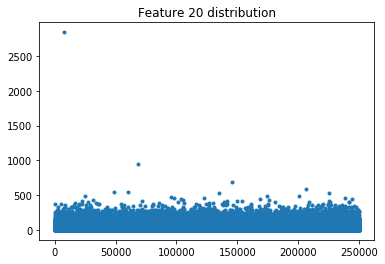

In [104]:
plt.scatter(index, feature_20, marker='.')
plt.title("Feature 20 distribution")

Text(0.5, 1.0, 'Boxplot for feature 20')

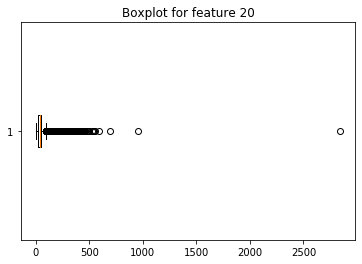

In [127]:
plt.boxplot(feature_20, vert=False)
plt.title("Boxplot for feature 20")

Text(0.5, 1.0, 'Boxplot for feature 20 without outliers')

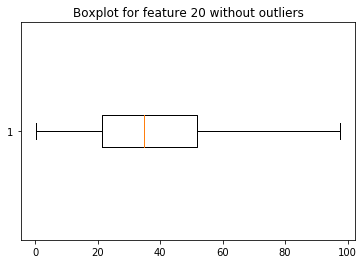

In [132]:
plt.boxplot(feature_20, vert=False, showfliers=False)
plt.title("Boxplot for feature 20 without outliers")

Same conclusion than 10 and 11. Significant data seems to range between 0 and 100.

## Feature 21

In [105]:
feature_21 = tX[:,20]
feature_21

array([-0.277, -1.916, -2.186, ..., -2.89 ,  0.811, -1.596])

Text(0.5, 1.0, 'Feature 21 distribution')

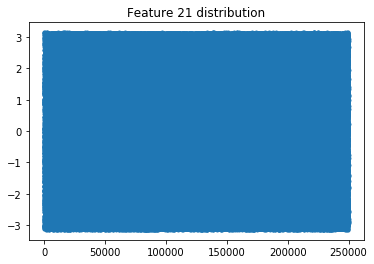

In [106]:
plt.scatter(index, feature_21, marker='.')
plt.title("Feature 21 distribution")

Text(0.5, 1.0, 'Boxplot for feature 21')

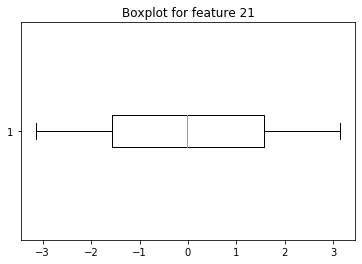

In [128]:
plt.boxplot(feature_21, vert=False)
plt.title("Boxplot for feature 21")

The data looks a lot like feature 15, 16, 19 and 18. Ranges from -3 to 3.

## Feature 22

In [107]:
feature_22 = tX[:,21]
feature_22

array([258.733, 164.546, 260.414, ..., 198.907, 112.718,  99.405])

Text(0.5, 1.0, 'Feature 22 distribution')

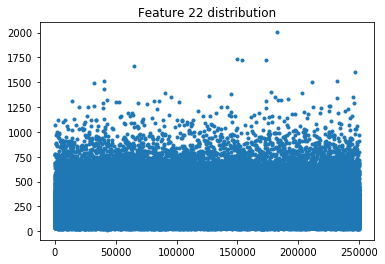

In [108]:
plt.scatter(index, feature_22, marker='.')
plt.title("Feature 22 distribution")

Text(0.5, 1.0, 'Boxplot for feature 22')

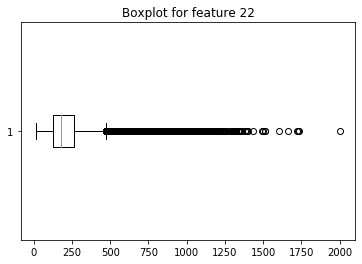

In [129]:
plt.boxplot(feature_22, vert=False)
plt.title("Boxplot for feature 22")

Text(0.5, 1.0, 'Boxplot for feature 22 without outliers')

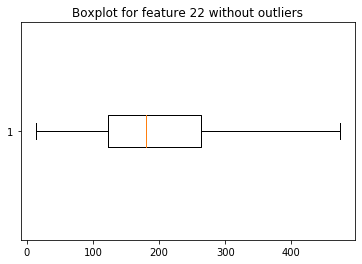

In [135]:
plt.boxplot(feature_22, vert=False, showfliers=False)
plt.title("Boxplot for feature 22 without outliers")

Same conclusion than 20, 10 and 11. Significant data seems to range between 0 and 500.

## Feature 23

In [109]:
feature_23 = tX[:,22]
feature_23

array([2., 1., 1., ..., 1., 0., 0.])

Text(0.5, 1.0, 'Feature 23 distribution')

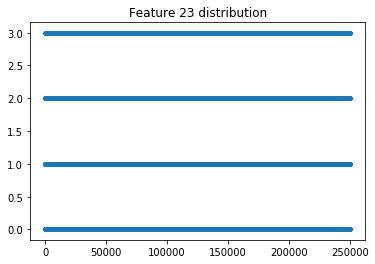

In [110]:
plt.scatter(index, feature_23, marker='.')
plt.title("Feature 23 distribution")

In [167]:
# let's count the number of 0, 1, 2 and 3
nb_0, nb_1, nb_2, nb_3 = 0, 0, 0, 0
for x in feature_23:
    if x==0: nb_0+=1
    if x==1: nb_1+=1
    if x==2: nb_2+=1
    if x==3: nb_3+=1
nb_0, nb_1, nb_2, nb_3

(99913, 77544, 50379, 22164)

A one-of-a-kind data that is only split between 0, 1, 2 and 3 in decreasing order.

## Feature 24

In [111]:
feature_24 = tX[:,23]
feature_24

array([  67.435,   46.226,   44.251, ...,   41.992, -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 24 distribution')

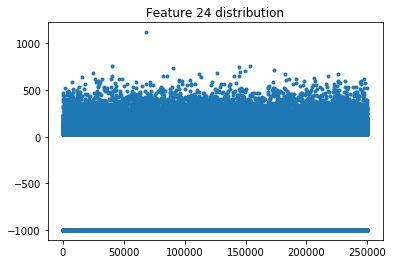

In [112]:
plt.scatter(index, feature_24, marker='.')
plt.title("Feature 24 distribution")

In [138]:
#let's remove the -999
cleaned_feature_24 = []
for x in feature_24:
    if x != -999:
        cleaned_feature_24.append(x)
len(cleaned_feature_24)

150087

Text(0.5, 1.0, 'Feature 24 distribution without -999')

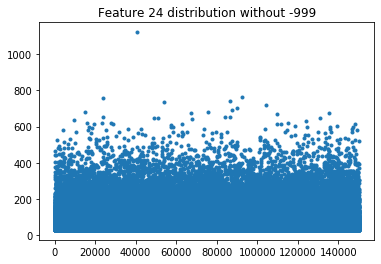

In [139]:
cleaned_index_24 = [i for i in range(len(cleaned_feature_24))]
plt.scatter(cleaned_index_24, cleaned_feature_24, marker='.')
plt.title("Feature 24 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 24')

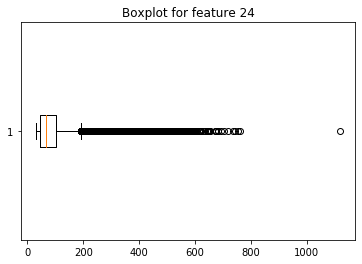

In [140]:
plt.boxplot(cleaned_feature_24, vert=False)
plt.title("Boxplot for feature 24")

Text(0.5, 1.0, 'Boxplot for feature 24 without outliers')

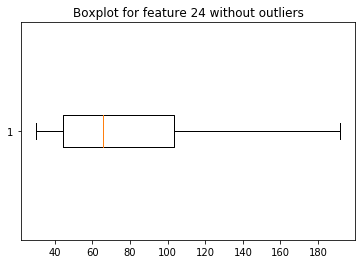

In [141]:
plt.boxplot(cleaned_feature_24, vert=False, showfliers=False)
plt.title("Boxplot for feature 24 without outliers")

The return of data with -999 data points. This one however have a different number of these. Significant data range between 30 and 190.

## Feature 25

In [113]:
feature_25 = tX[:,24]
feature_25

array([ 2.150e+00,  7.250e-01,  2.053e+00, ...,  1.800e+00, -9.990e+02,
       -9.990e+02])

Text(0.5, 1.0, 'Feature 25 distribution')

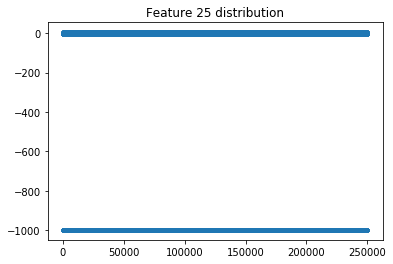

In [114]:
plt.scatter(index, feature_25, marker='.')
plt.title("Feature 25 distribution")

In [142]:
#let's remove the -999
cleaned_feature_25 = []
for x in feature_25:
    if x != -999:
        cleaned_feature_25.append(x)
len(cleaned_feature_25)

150087

Text(0.5, 1.0, 'Feature 25 distribution without -999')

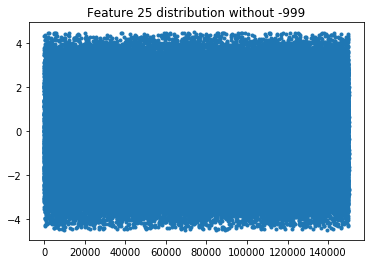

In [150]:
cleaned_index_25 = [i for i in range(len(cleaned_feature_25))]
plt.scatter(cleaned_index_25, cleaned_feature_25, marker='.')
plt.title("Feature 25 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 25')

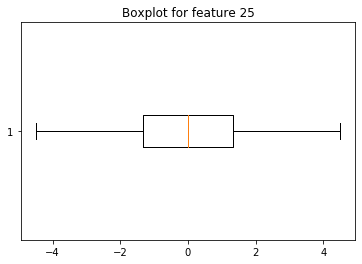

In [146]:
plt.boxplot(cleaned_feature_25, vert=False)
plt.title("Boxplot for feature 25")

In [148]:
feature_24_comparator = np.copy(feature_24)
for i in range(len(feature_24_comparator)):
    if feature_24_comparator[i] != -999:
        feature_24_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
feature_25_comparator = np.copy(feature_25)
for i in range(len(feature_25_comparator)):
    if feature_25_comparator[i] != -999:
        feature_25_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_24_comparator - feature_25_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

Feature data with -999 data points. This one however has the same as feature 24 therefore we can conclude a link between the two. Significant data range between -4 and 4.

## Feature 26

In [115]:
feature_26 = tX[:,25]
feature_26

array([ 4.440e-01,  1.158e+00, -2.028e+00, ..., -1.660e-01, -9.990e+02,
       -9.990e+02])

Text(0.5, 1.0, 'Feature 26 distribution')

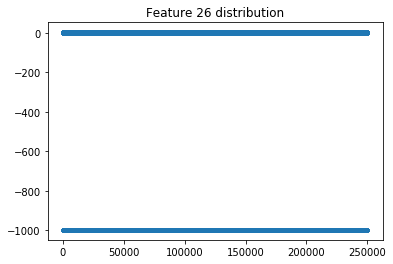

In [116]:
plt.scatter(index, feature_26, marker='.')
plt.title("Feature 26 distribution")

In [149]:
#let's remove the -999
cleaned_feature_26 = []
for x in feature_26:
    if x != -999:
        cleaned_feature_26.append(x)
len(cleaned_feature_26)

150087

Text(0.5, 1.0, 'Feature 26 distribution without -999')

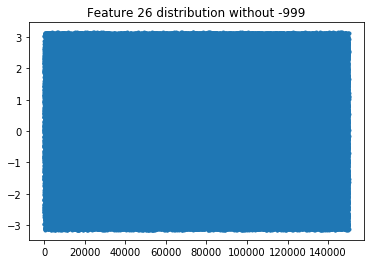

In [151]:
cleaned_index_26 = [i for i in range(len(cleaned_feature_26))]
plt.scatter(cleaned_index_26, cleaned_feature_26, marker='.')
plt.title("Feature 26 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 26')

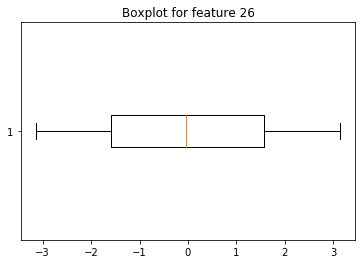

In [152]:
plt.boxplot(cleaned_feature_26, vert=False)
plt.title("Boxplot for feature 26")

In [153]:
feature_26_comparator = np.copy(feature_26)
for i in range(len(feature_26_comparator)):
    if feature_26_comparator[i] != -999:
        feature_26_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_26_comparator - feature_25_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

Feature data with -999 data points. This one has the same as feature 24 and 25 therefore we can conclude a link between them. Significant data range between -3 and 3.

## Feature 27

In [117]:
feature_27 = tX[:,26]
feature_27

array([  46.062, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 27 distribution')

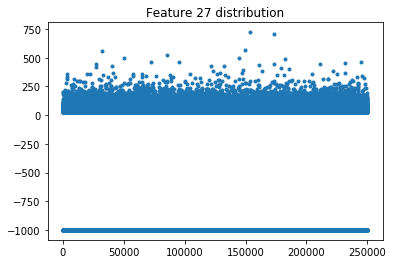

In [118]:
plt.scatter(index, feature_27, marker='.')
plt.title("Feature 27 distribution")

In [154]:
#let's remove the -999
cleaned_feature_27 = []
for x in feature_27:
    if x != -999:
        cleaned_feature_27.append(x)
len(cleaned_feature_27)

72543

Text(0.5, 1.0, 'Feature 27 distribution without -999')

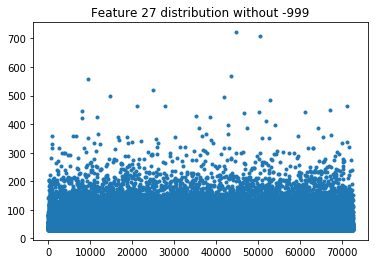

In [155]:
cleaned_index_27 = [i for i in range(len(cleaned_feature_27))]
plt.scatter(cleaned_index_27, cleaned_feature_27, marker='.')
plt.title("Feature 27 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 27')

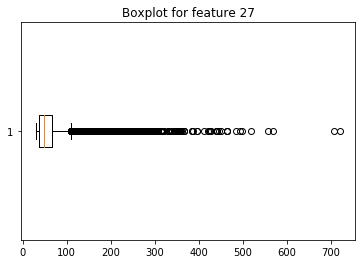

In [156]:
plt.boxplot(cleaned_feature_27, vert=False)
plt.title("Boxplot for feature 27")

Text(0.5, 1.0, 'Boxplot for feature 27 without outliers')

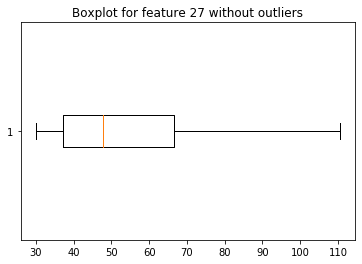

In [157]:
plt.boxplot(cleaned_feature_27, vert=False, showfliers=False)
plt.title("Boxplot for feature 27 without outliers")

In [158]:
feature_27_comparator = np.copy(feature_27)
for i in range(len(feature_27_comparator)):
    if feature_27_comparator[i] != -999:
        feature_27_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_27_comparator - feature_5_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

Feature data with -999 data points. This one has the same as feature 5 therefore we can conclude a link between them. Significant data range between 30 and 110.

## Feature 28

In [119]:
feature_28 = tX[:,27]
feature_28

array([   1.24, -999.  , -999.  , ..., -999.  , -999.  , -999.  ])

Text(0.5, 1.0, 'Feature 28 distribution')

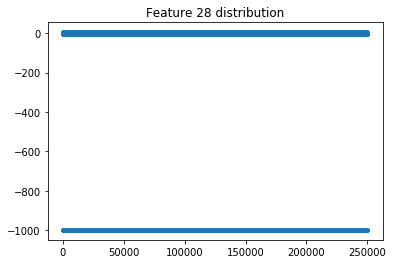

In [120]:
plt.scatter(index, feature_28, marker='.')
plt.title("Feature 28 distribution")

In [168]:
#let's remove the -999
cleaned_feature_28 = []
for x in feature_28:
    if x != -999:
        cleaned_feature_28.append(x)
len(cleaned_feature_28)

72543

Text(0.5, 1.0, 'Feature 28 distribution without -999')

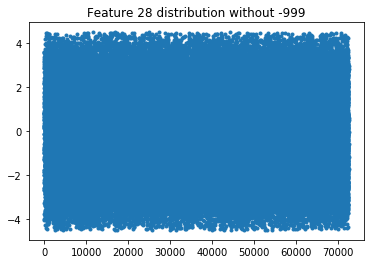

In [169]:
cleaned_index_28 = [i for i in range(len(cleaned_feature_28))]
plt.scatter(cleaned_index_28, cleaned_feature_28, marker='.')
plt.title("Feature 28 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 28')

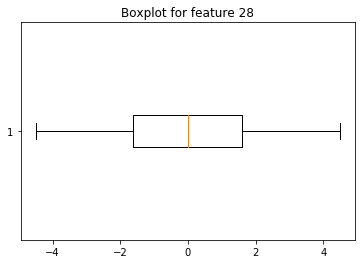

In [170]:
plt.boxplot(cleaned_feature_28, vert=False)
plt.title("Boxplot for feature 28")

In [171]:
feature_28_comparator = np.copy(feature_28)
for i in range(len(feature_28_comparator)):
    if feature_28_comparator[i] != -999:
        feature_28_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_28_comparator - feature_5_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

Feature data with -999 data points. This one has the same as feature 5 therefore we can conclude a link between them. Data without outliers that range between -4 and 4.

## Feature 29

In [121]:
feature_29 = tX[:,28]
feature_29

array([  -2.475, -999.   , -999.   , ..., -999.   , -999.   , -999.   ])

Text(0.5, 1.0, 'Feature 29 distribution')

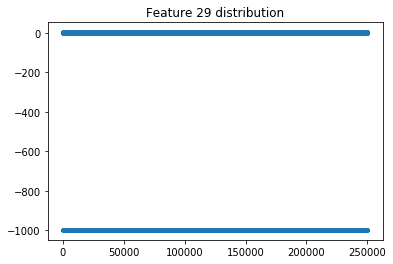

In [122]:
plt.scatter(index, feature_29, marker='.')
plt.title("Feature 29 distribution")

In [159]:
#let's remove the -999
cleaned_feature_29 = []
for x in feature_29:
    if x != -999:
        cleaned_feature_29.append(x)
len(cleaned_feature_29)

72543

Text(0.5, 1.0, 'Feature 29 distribution without -999')

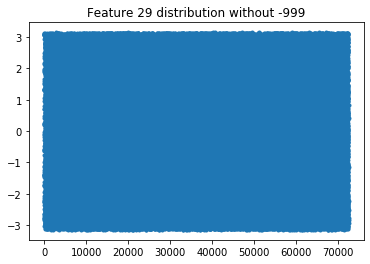

In [160]:
cleaned_index_29 = [i for i in range(len(cleaned_feature_29))]
plt.scatter(cleaned_index_29, cleaned_feature_29, marker='.')
plt.title("Feature 29 distribution without -999")

Text(0.5, 1.0, 'Boxplot for feature 29')

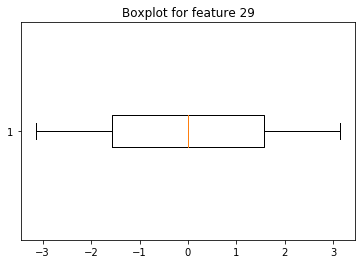

In [161]:
plt.boxplot(cleaned_feature_29, vert=False)
plt.title("Boxplot for feature 29")

In [163]:
feature_29_comparator = np.copy(feature_29)
for i in range(len(feature_29_comparator)):
    if feature_29_comparator[i] != -999:
        feature_29_comparator[i] = 0 #build comparator by zeroing non -999 data points
        
#compare them
comparison = sum(abs(feature_29_comparator - feature_5_comparator))
comparison #if both vectors have the same -999 points, comparison = 0

0.0

Feature data with -999 data points. This one has the same as feature 5 therefore we can conclude a link between them. Data without outliers that range between -3 and 3.

## Feature 30

In [123]:
feature_30 = tX[:,29]
feature_30

array([113.497,  46.226,  44.251, ...,  41.992,   0.   ,   0.   ])

Text(0.5, 1.0, 'Feature 30 distribution')

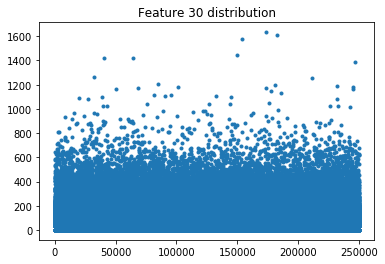

In [124]:
plt.scatter(index, feature_30, marker='.')
plt.title("Feature 30 distribution")

Text(0.5, 1.0, 'Boxplot for feature 30')

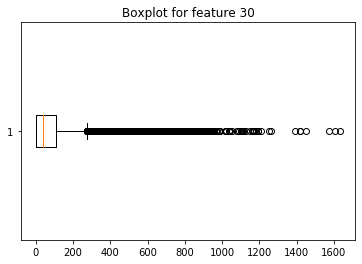

In [131]:
plt.boxplot(feature_30, vert=False)
plt.title("Boxplot for feature 30")

Text(0.5, 1.0, 'Boxplot for feature 30 without outliers')

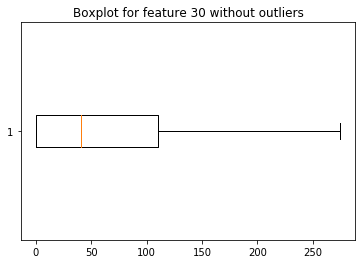

In [134]:
plt.boxplot(feature_30, vert=False, showfliers=False)
plt.title("Boxplot for feature 30 without outliers")

Same conclusion than 10 and 11. Significant data seems to range between 0 and 275.